In [2]:
%pylab inline 

terminos = {}

Populating the interactive namespace from numpy and matplotlib


Funciones de función exacta y de aproximación con sumas parciales de la serie de Fourier

In [94]:
def cuadrada_parcial(x, n, L = 1):
    suma = 0
    
    for i in range(n):
        suma += (1) * 1./(2*i + 1) * np.sin((2*i + 1)*np.pi*x/L)
    
    return suma

def cuadrada(x, L = 1):
    xe = x % (2*L)
    if xe < L:
        return np.pi/4
    return -np.pi/4

Algunas gráficas de estas funciones.

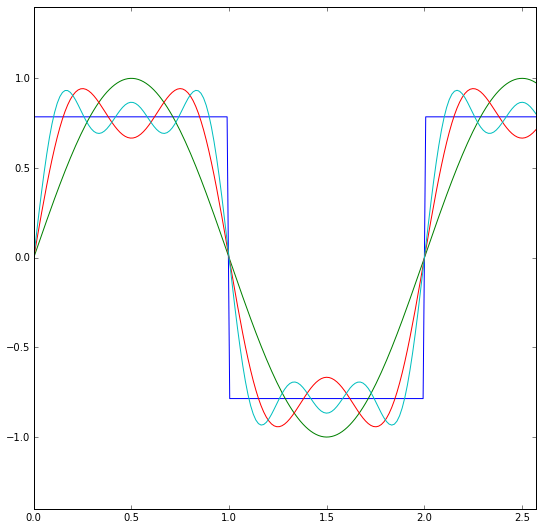

In [95]:
figc = plt.figure("Cuadrada", figsize = (9, 9))

x = np.linspace(0, 4, 300)
yc = array([cuadrada(el) for el in x])

plt.axis([0,np.pi/2 + 1, -1.4, 1.4])
plt.plot(x, yc)

for i in range(1, 1 + 3):
    y = array([cuadrada_parcial(el, 1 * i) for el in x])
    plt.plot(x, y)

plt.show()

In [36]:
from scipy.optimize import basinhopping as baho

Cálculo de diferencia entre valores en los extremos globales de la función.

In [88]:
saltos = []
numero = 30

for i in range(1, 1 + numero):
    cp = lambda x: cuadrada_parcial(x, i)
    saltos.append(abs(baho(cp, 1, stepsize = 1./10).fun * 2))

Gráfica de aproximaciones de la constante de Gibbs según el número de términos utilizados de la serie de Fourier:

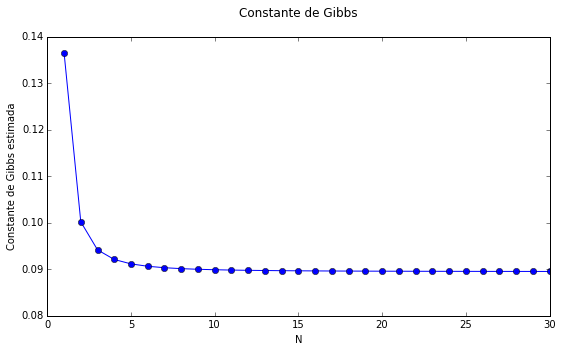

In [97]:
ns = array([i for i in range(1, 1 + numero)])

cG = [(el - np.pi/2) / (np.pi)  for el in saltos]

figG = plt.figure("Gibs", figsize = (9, 5))

plt.title("Constante de Gibbs\n")
plt.xlabel("N")
plt.ylabel("Constante de Gibbs estimada")
plt.plot(ns, cG, 'bo-')